In [15]:
import numpy as np
import pandas as pd
from folium import folium
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler


Import the libraries needed for the purpose of machine learning model, EDA.

In [16]:
# reading the csv file of the crimes in the boston.
crimeData = pd.read_csv(
    r"/crime.csv",
    encoding='latin-1')
# datatype of the crime data
print("file of the crime data: ", type(crimeData))
# reading  the first 10 files of the csv.
print(crimeData.head(10))



# description of the data of the crimes in the boston.
print(crimeData.describe())


# checking the data types of the csv file.
print(crimeData.dtypes)

# Total columns in the crime data
columns = crimeData.columns
print("The columns of the crime data: \n", columns)

# Total number of crimes in each district
district_crime = crimeData['DISTRICT'].value_counts()
print("The total number of crimes in each district: \n", district_crime)

# Performing Exploratory Data Analysis
nullCount = crimeData.isnull().sum()
print("The values of the csv that are null: \n", nullCount)

# checking the shape of the csv file.
print("The shape of the data: ", crimeData.shape)

# Drop rows where 'DISTRICT' is NaN
crimeNormalData = crimeData.dropna(subset=['DISTRICT'])

# checking the description of the data.
print(crimeNormalData.describe())

# checking the null count after the drop of the data.
nullCount = crimeNormalData.isnull().sum()
print("The values of the csv that are null: \n", nullCount)

# Drop rows where 'DISTRICT' is NaN
crimeNormalData = crimeNormalData.dropna(subset=['DISTRICT'])

# checking the description of the data.
print(crimeNormalData.describe())

# Fill missing values for 'UCR_PART' and 'STREET' with mode
for column in ['UCR_PART', 'STREET']:
    crimeNormalData[column].fillna(crimeNormalData[column].mode()[0], inplace=True)



# Drop rows where 'STREET' is NaN
crimeNormalData = crimeNormalData.dropna(subset=['STREET'])

# checking the description of the data.
print(crimeNormalData.describe())

# drop the location as lat and long is already given.
crimeNormalData = crimeNormalData.drop('Location', axis=1)
# now checking the description of the data.
print(crimeNormalData.describe())
# checking whether the location is dropped or not.
print(crimeNormalData.columns)

# checking the null count after the drop of the data.
nullCount = crimeNormalData.isnull().sum()
print("The values of the csv that are null: \n", nullCount)

# Fill missing values for 'Lat' and 'Long' with mean
# for column in ['Lat', 'Long']:
#     crimeNormalData[column].fillna(crimeNormalData[column].mean(), inplace=True)


# Drop rows where 'Lat' and 'Long' are null
crimeNormalData = crimeNormalData.dropna(subset=['Lat', 'Long'])




# Replace NaN values with 0 in 'SHOOTING' column
crimeNormalData['SHOOTING'].fillna(0, inplace=True)

# Replace 'Y' with 1.4 in 'SHOOTING' column
crimeNormalData['SHOOTING'].replace('Y', 1, inplace=True)

# checking the null values of the data.
nullCount = crimeNormalData.isnull().sum()
print("The values of the csv that are null: \n", nullCount)

# converting categorical data to numerical data.
value_count = crimeNormalData['DAY_OF_WEEK'].value_counts()
print("The value count of the DAY_OF_WEEK: \n", value_count)





file of the crime data:  <class 'pandas.core.frame.DataFrame'>
  INCIDENT_NUMBER  OFFENSE_CODE               OFFENSE_CODE_GROUP  \
0      I182070945           619                          Larceny   
1      I182070943          1402                        Vandalism   
2      I182070941          3410                            Towed   
3      I182070940          3114             Investigate Property   
4      I182070938          3114             Investigate Property   
5      I182070936          3820  Motor Vehicle Accident Response   
6      I182070933           724                       Auto Theft   
7      I182070932          3301                  Verbal Disputes   
8      I182070931           301                          Robbery   
9      I182070929          3301                  Verbal Disputes   

                          OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA  \
0                          LARCENY ALL OTHERS      D14            808   
1                                   VANDAL

<ipython-input-16-2972630525db>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimeNormalData['SHOOTING'].fillna(0, inplace=True)
<ipython-input-16-2972630525db>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crimeNormalData['SHOOTING'].replace('Y', 1, inplace=True)


The values of the csv that are null: 
 INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
dtype: int64
The value count of the DAY_OF_WEEK: 
 DAY_OF_WEEK
Friday       45256
Wednesday    43616
Thursday     43440
Tuesday      43157
Monday       42622
Saturday     41694
Sunday       37808
Name: count, dtype: int64


In [17]:
# Save the cleaned data to a new CSV file
cleanCrimeData = crimeNormalData.to_csv('crimeData_clean.csv', index=False)

# Create a dictionary to map days of the week to numerical values
days_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Use the map function to replace the days of the week with numerical values
crimeNormalData['DAY_OF_WEEK'] = crimeNormalData['DAY_OF_WEEK'].map(days_mapping)
# Print some data.
print(crimeNormalData['DAY_OF_WEEK'].head())

# Create a dictionary to map UCR_PART to numerical values
ucr_mapping = {'Part One': 1, 'Part Two': 2, 'Part Three': 3}
# Use the map function to replace the UCR_PART with numerical values
crimeNormalData['UCR_PART'] = crimeNormalData['UCR_PART'].map(ucr_mapping)
# Print some data.
print(crimeNormalData['UCR_PART'].head())
# checking the shape of the csv file.
print("The shape of the data: ", crimeNormalData.shape)



# checking the null values of the data.
nullCount = crimeNormalData.isnull().sum()
print("The values of the csv that are null: \n", nullCount)



0    7
1    2
2    1
3    1
4    1
Name: DAY_OF_WEEK, dtype: int64
0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
Name: UCR_PART, dtype: float64
The shape of the data:  (297593, 16)
The values of the csv that are null: 
 INCIDENT_NUMBER           0
OFFENSE_CODE              0
OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                  0
REPORTING_AREA            0
SHOOTING                  0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
UCR_PART               1147
STREET                    0
Lat                       0
Long                      0
dtype: int64


data with clean consistency is stored in the crimeData_clean.csv

label encoding of the data below

In [18]:

# Create a label encoder
encode = LabelEncoder()
# Fit and transform the 'OFFENSE_CODE_GROUP' column
crimeNormalData['OFFENSE_CODE_GROUP'] = encode.fit_transform(crimeNormalData['OFFENSE_CODE_GROUP'])
crimeNormalData['OFFENSE_DESCRIPTION'] = encode.fit_transform(crimeNormalData['OFFENSE_DESCRIPTION'])
crimeNormalData['INCIDENT_NUMBER'] = encode.fit_transform(crimeNormalData['INCIDENT_NUMBER'])
crimeNormalData['OCCURRED_ON_DATE'] = encode.fit_transform(crimeNormalData['OCCURRED_ON_DATE'])
crimeNormalData['DISTRICT'] = encode.fit_transform(crimeNormalData['DISTRICT'])
crimeNormalData['STREET'] = encode.fit_transform(crimeNormalData['STREET'])
# Print the first 5 rows to see the changes
print(crimeNormalData.head())
print(crimeNormalData['OFFENSE_DESCRIPTION'].head())
crimeNormalData.replace(' ', np.nan, inplace=True)

# Drop the rows where at least one element is missing.
crimeNormalData.dropna(inplace=True)
# now we will save the normalized data into the csv file so that it can be used for the further analysis.
# In the Machine Learning models.
newCrimeData = crimeNormalData.to_csv('crimeData_normal.csv', index=False)

   INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  OFFENSE_DESCRIPTION  \
0           263980           619                  34                  128   
1           263979          1402                  63                  225   
2           263978          3410                  62                  217   
3           263977          3114                  32                  122   
4           263976          3114                  32                  122   

   DISTRICT REPORTING_AREA  SHOOTING  OCCURRED_ON_DATE  YEAR  MONTH  \
0         7            808         0            218924  2018      9   
1         5            347         0            216578  2018      8   
2         8            151         0            219135  2018      9   
3         8            272         0            219146  2018      9   
4         4            421         0            219144  2018      9   

   DAY_OF_WEEK  HOUR  UCR_PART  STREET        Lat       Long  
0            7    13       1.0    2120  42.3577

In [19]:
# prompt: can you make the above file normalized and ready to use directly for the machine learning model

# Normalize the data using RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(crimeNormalData)

# Convert the scaled data back to a DataFrame
normalized_data = pd.DataFrame(scaled_data, columns=crimeNormalData.columns)

# Save the normalized data to a new CSV file
normalized_data.to_csv('crimeData_normalized.csv', index=False)

print("Data normalization complete.")


Data normalization complete.


# **Applying machine learning models  on the normalized data here **

In [20]:
# prompt: now can you apply machine learning model of classification on the this data

# Load the normalized data
normalized_data = pd.read_csv('crimeData_normalized.csv')

# Separate features and target
X = normalized_data.drop('SHOOTING', axis=1)
y = normalized_data['SHOOTING']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Print the classification report
print("Classification report:\n", classification_report(y_test, y_pred))

# Tune the hyperparameters of the Random Forest classifier using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rfc = RandomForestClassifier(**grid_search.best_params_)
best_rfc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

# Print the classification report
print("Classification report:\n", classification_report(y_test, y_pred))

# Perform cross-validation on the best model
scores = cross_val_score(best_rfc, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())



Accuracy: 0.9969844819407738
Confusion matrix:
 [[58816    10]
 [  168    34]]
Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     58826
         1.0       0.77      0.17      0.28       202

    accuracy                           1.00     59028
   macro avg       0.88      0.58      0.64     59028
weighted avg       1.00      1.00      1.00     59028



KeyboardInterrupt: 

In [21]:
# prompt: can you create a linear regression model for prediction on the above data

import numpy as np
from sklearn.linear_model import LinearRegression

# Load the normalized data
normalized_data = pd.read_csv('crimeData_normalized.csv')

# Separate features and target
X = normalized_data.drop('SHOOTING', axis=1)
y = normalized_data['SHOOTING']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("R-squared score:", r2)


Mean squared error: 0.0033805266768423634
R-squared score: 0.008757723098674619


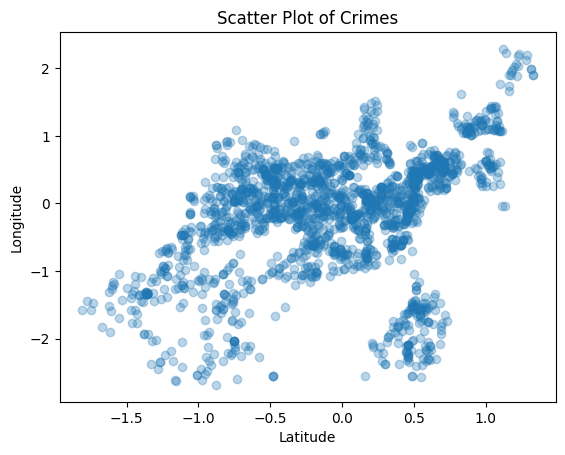

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


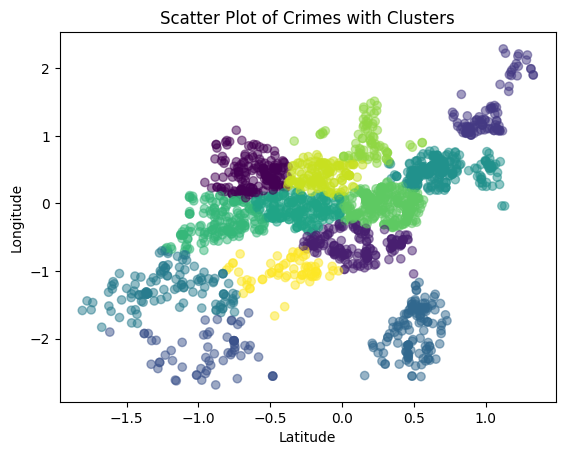

In [27]:
# prompt: perform scatter plot on the dataset for the crimes can you take sample of 10000 only  can you perform clustering on it based on the district of crime

import matplotlib.pyplot as plt
import pandas as pd

# Load the normalized data
normalized_data = pd.read_csv('crimeData_normalized.csv')

# Take a sample of 10000
sample_data = normalized_data.sample(n=2000)

# Create a scatter plot
plt.scatter(sample_data['Lat'], sample_data['Long'],alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Crimes')
plt.show()

# Perform clustering based on the district of crime
kmeans = KMeans(n_clusters=13)
kmeans.fit(sample_data[['Lat', 'Long']])

# Add cluster labels to the data frame
sample_data['Cluster'] = kmeans.labels_

# Create a scatter plot with clusters
plt.scatter(sample_data['Lat'], sample_data['Long'], c=sample_data['Cluster'],alpha=0.5)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Crimes with Clusters')
plt.show()



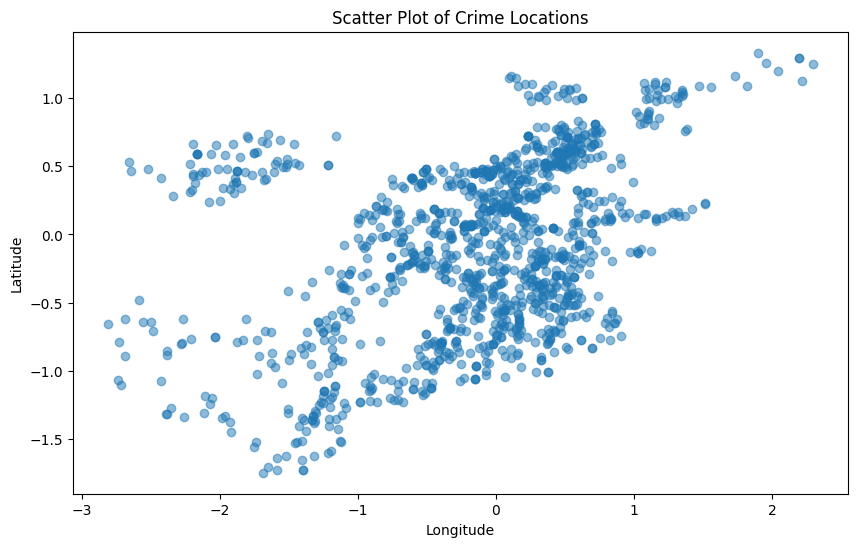

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


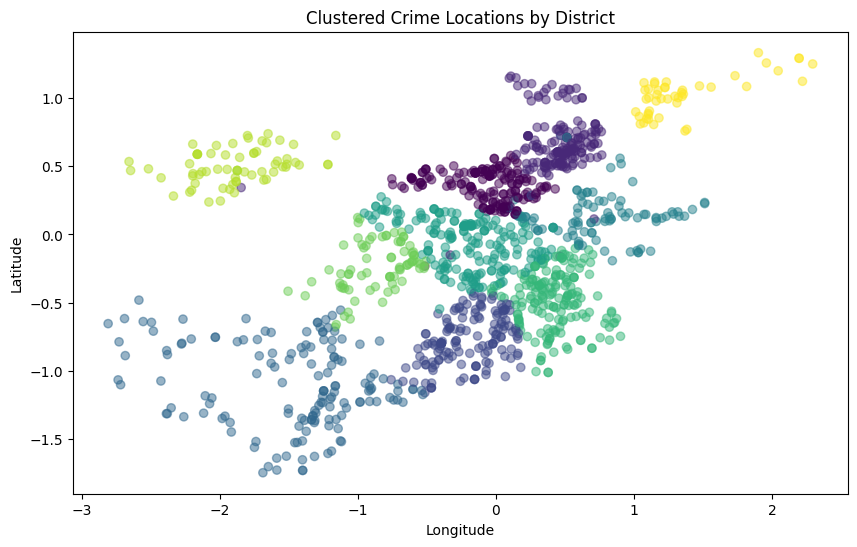

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the normalized data
normalized_data = pd.read_csv('crimeData_normalized.csv')

# Take a sample of 10000
sample_data = normalized_data.sample(n=1300)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['Long'], sample_data['Lat'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Crime Locations')
plt.show()

# Perform clustering based on the district of crime
from sklearn.cluster import KMeans

# Extract the district column
districts = sample_data['DISTRICT']

# Create a KMeans object with 10 clusters
kmeans = KMeans(n_clusters=10)

# Fit the model to the data
kmeans.fit(districts.values.reshape(-1, 1))

# Get the cluster labels
labels = kmeans.labels_

# Print the cluster labels
#print(labels)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(sample_data['Long'], sample_data['Lat'], c=labels, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.title('Clustered Crime Locations by District')
plt.show()

In [32]:
# prompt: now can you add this above clusters to the point to the map  of boston

# Import necessary libraries
import folium
from folium.plugins import MarkerCluster

# Load the normalized data
normalized_data = pd.read_csv('crimeData_clean.csv')

# Take a sample of 10000
sample_data = normalized_data.sample(n=50000)

# Create a base map
map = folium.Map(location=[42.3295, -71.0826], zoom_start=12)

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map)

# Loop through the sample data and add markers to the map
for _, row in sample_data.iterrows():
    marker = folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=folium.Popup(row['OFFENSE_DESCRIPTION'])
    )
    marker_cluster.add_child(marker)

# Add the map to the output
map
map.save('markerclustermap.html')


In [1]:
# prompt: can you we dbscan clusters in it instead of the marker cluster.

# Import necessary libraries
from folium.plugins import MarkerCluster
import folium
from sklearn.cluster import DBSCAN

# Load the normalized data
normalized_data = pd.read_csv('crimeData_clean.csv')

# Take a sample of 10000
sample_data = normalized_data.sample(n=5000)

# Create a base map
map = folium.Map(location=[42.3295, -71.0826], zoom_start=12)

# Create a DBSCAN object with eps=0.05 and min_samples=10
dbscan = DBSCAN(eps=0.05, min_samples=10)

# Fit the model to the data
dbscan.fit(sample_data[['Lat', 'Long']])

# Get the cluster labels
labels = dbscan.labels_

# Create a marker cluster
marker_cluster = MarkerCluster().add_to(map)

# Loop through the sample data and add markers to the map
for i, row in sample_data.iterrows():
    marker = folium.Marker(
        location=[row['Lat'], row['Long']],
        popup=folium.Popup(row['OFFENSE_DESCRIPTION']),
        icon=folium.Icon(color='green' if labels[i] == 0 else 'red')
    )
    marker_cluster.add_child(marker)

# Add the map to the output
map
map.save('dbscanmap.html')


NameError: name 'pd' is not defined